In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

%matplotlib inline

In [2]:
!head data/sales_data.csv

ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
10107,30,95.7,2,2871,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,NA,Yu,Kwai,Small
10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,,Reims,,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,,Paris,,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.7,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,,Pasadena,CA,90003,USA,NA,Young,Julie,Medium
10159,49,100,14,5205.27,10/10/2003 0:00,

In [4]:
sales = pd.read_csv('data/sales_data2.csv')

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   MSRP             2823 non-null   int64  
 9   PHONE            2823 non-null   object 
dtypes: float64(2), int64(7), object(1)
memory usage: 220.7+ KB


In [6]:
sales.shape
sales.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


<!-- Numerical costs and visualization -->

In [7]:
sales['QUANTITYORDERED'].describe()

count    2823.000000
mean       35.092809
std         9.741443
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

In [8]:
sales['QUANTITYORDERED'].mean()

35.09280906836698

In [9]:
sales['QUANTITYORDERED'].median()

35.0

<Axes: >

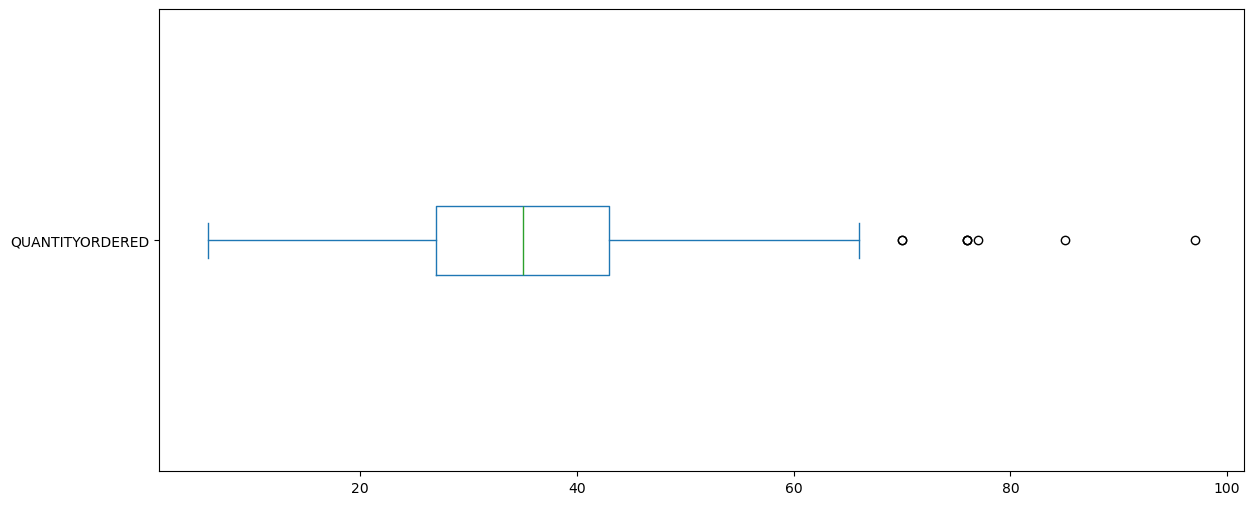

In [10]:
sales['QUANTITYORDERED'].plot(kind='box',vert=False, figsize=(14,6))

<Axes: ylabel='Density'>

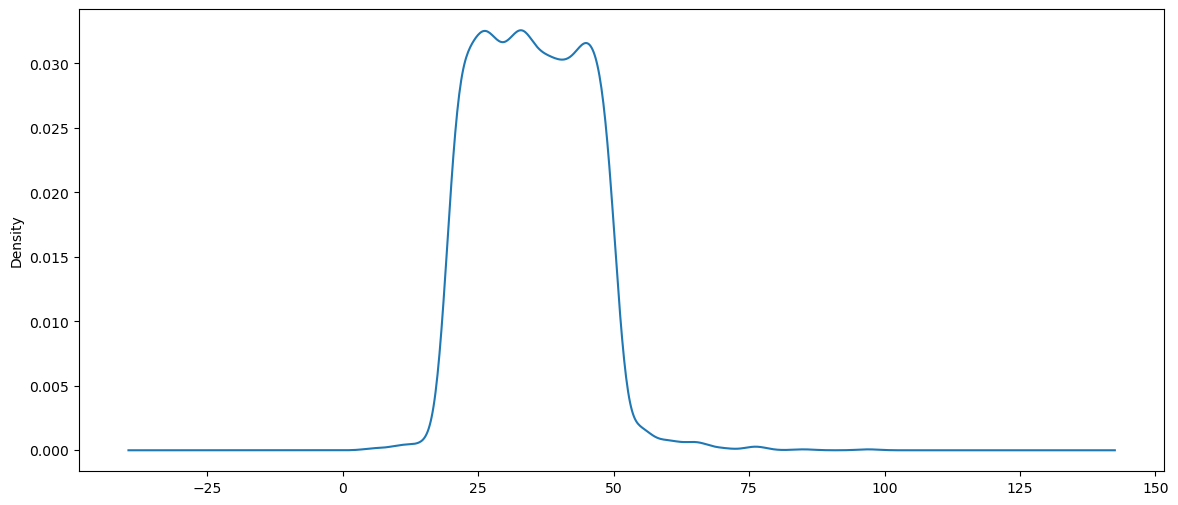

In [11]:
sales['QUANTITYORDERED'].plot(kind='density', figsize=(14,6))

In [12]:
sales.head()
# sales.info()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PHONE
0,10107,30,95.70,2,2871.00,1,2,2003,95,2125557818
1,10121,34,81.35,5,2765.90,2,5,2003,95,26.47.1555
2,10134,41,94.74,2,3884.34,3,7,2003,95,+33 1 46 62 7555
3,10145,45,83.26,6,3746.70,3,8,2003,95,6265557265
4,10159,49,100.00,14,5205.27,4,10,2003,95,6505551386


<Axes: >

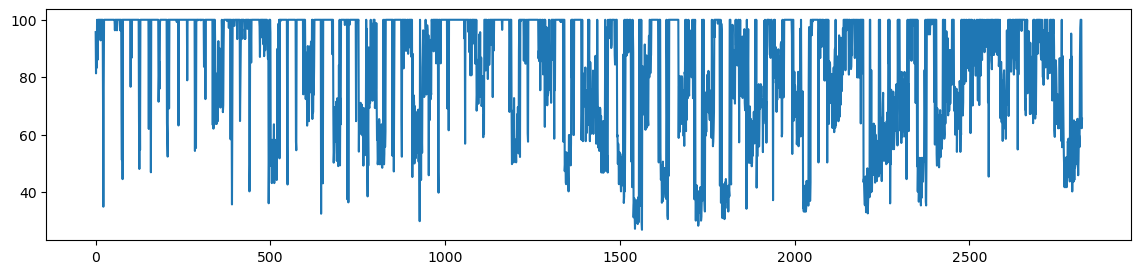

In [13]:
sales['PRICEEACH'].plot(kind='line', figsize=(14,3))

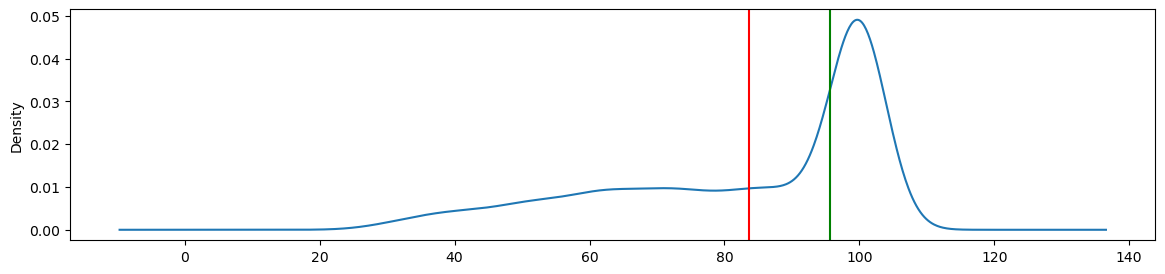

In [14]:
ax = sales['PRICEEACH'].plot(kind='density', figsize=(14,3))
ax.axvline(sales['PRICEEACH'].mean(), color='red')
ax.axvline(sales['PRICEEACH'].median(), color='green')


Text(0.5, 0, 'Prices')

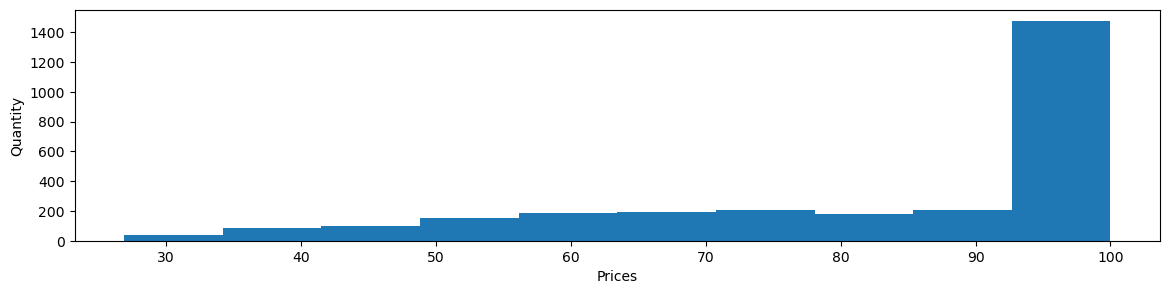

In [15]:
ax = sales['PRICEEACH'].plot(kind='hist', figsize=(14,3))
ax.set_ylabel("Quantity")
ax.set_xlabel("Prices")


<!-- Categorical analysis and visualization -->
<!-- #We analyse the month_id -->

In [16]:
sales.head(100)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PHONE
0,10107,30,95.70,2,2871.00,1,2,2003,95,2125557818
1,10121,34,81.35,5,2765.90,2,5,2003,95,26.47.1555
2,10134,41,94.74,2,3884.34,3,7,2003,95,+33 1 46 62 7555
3,10145,45,83.26,6,3746.70,3,8,2003,95,6265557265
4,10159,49,100.00,14,5205.27,4,10,2003,95,6505551386
...,...,...,...,...,...,...,...,...,...,...
95,10285,27,100.00,8,5438.07,3,8,2004,193,6175558555
96,10299,29,100.00,11,6683.34,3,9,2004,193,90-224 8555
97,10308,20,100.00,1,4570.40,4,10,2004,193,9145554562
98,10318,37,100.00,3,7667.14,4,11,2004,193,2155551555


In [17]:
sales['MONTH_ID'].value_counts()
# sales['MONTH_ID'].count()

MONTH_ID
11    597
10    317
5     252
1     229
2     224
3     212
8     191
12    180
4     178
9     171
7     141
6     131
Name: count, dtype: int64

<Axes: ylabel='count'>

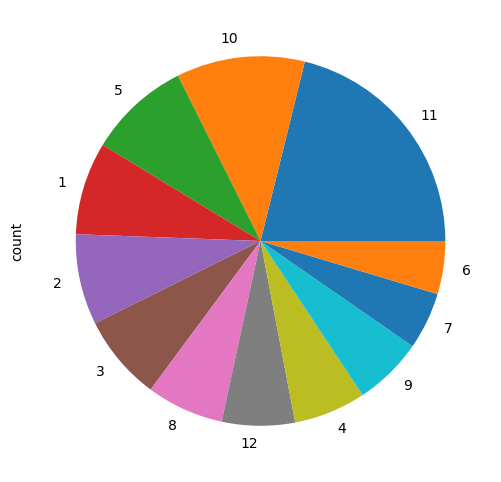

In [18]:
sales['MONTH_ID'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0.5, 0, 'Month')

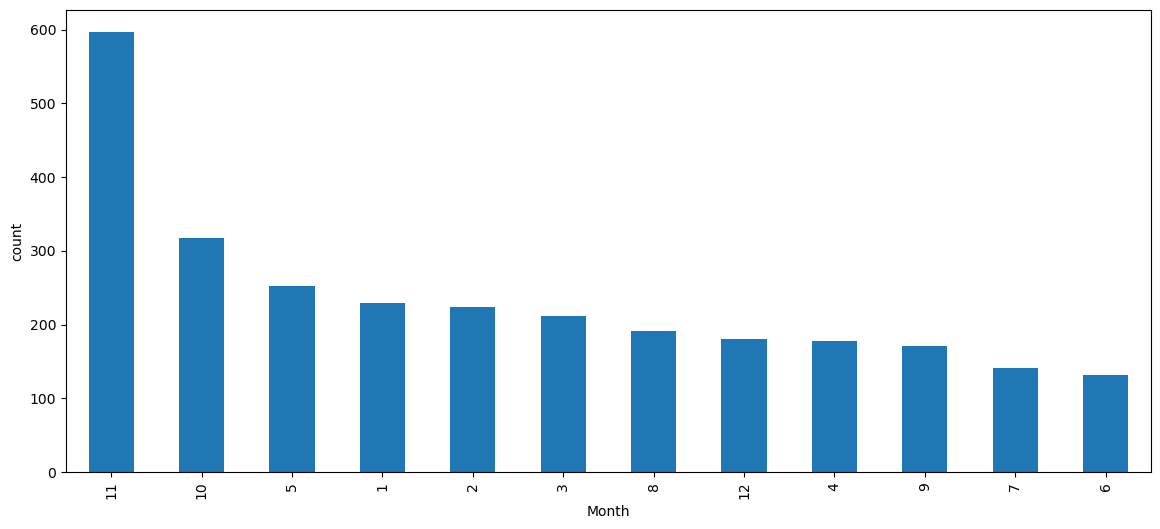

In [19]:
ax = sales['MONTH_ID'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('count')
ax.set_xlabel('Month')


<!-- Relationship between columns -->
<!-- Can we find any significant relations ? -->

In [20]:
# corr = sales.corr()
# sales.head()
# # corr

ValueError: could not convert string to float: '26.47.1555'